![imagen](./img/seaborn.png)


# Exploratory Data Analysis with Seaborn
Entender cómo se hacen las gráficas en python está muy bien, pero lo importante es saber cuándo usarlas. En este notebook no se pretende explicar todos los tipos de gráficas que hay (histogramas, scatter plots, heatmaps...), en primer lugar porque es imposible abarcarlo todo, y en segundo lugar porque hay que ir un paso atrás antes de elegir la gráfica, ya que tenemos que comprender de qué tipo son los datos y qué es lo que estamos buscando con cada gráfica.

Por tanto, primero tendremos que identificar el tipo de los datos y cuántas variables vamos a representar
- Una variable numérica
- Una variable categórica
- Dos variables numéricas
- Tres o más variables numéricas
- Dos variables categóricas
- Variables numéricas y categóricas

Teniendo claro esto, junto con un buen catálogo de gráficas, lo tendremos mucho más fácil.

https://www.data-to-viz.com/

In [2]:
# !pip install seaborn

In [3]:
# Importamos todos los paquetes que vayamos a necesitar
from sklearn.datasets import load_iris #load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Algunas configuraciones de los paquetes
pd.set_option("display.max_rows", 500) # Cuántas filas de los DataFrames nos "escupe" pandas en el Notebook
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Cargamos las features en un DataFrame:
iris_df = pd.DataFrame(load_iris()["data"],columns=load_iris()["feature_names"])
boston_df = pd.read_csv('data/HousingData.csv')
boston_df.rename(columns={'MEDV': 'Target'}, inplace=True)

In [5]:
# Y añadimos la columna de especies:
iris_df["Target"] = load_iris()["target_names"][load_iris()["target"]]

# Cargamos tb el dataset del titanic
titanic_df = pd.read_csv("data/titanic.csv", sep="\t")

# Cargamos los datos del supermarket sales
market_df = pd.read_csv("data/supermarket_sales.csv")

# Cargamos dataset de suicidios
suicid_df = pd.read_csv("data/suicide.csv")

In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [8]:
market_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
suicid_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Tipos de las variables
Antes de representar cualquier variable es imprescindible comprender qué tipo de datos queremos representar. Tenemos los siguientes:

![imagen](./img/dtypes.png)

## 1. Análisis univariante
### 1.1 Variables cuantitativas
Si queremos ver cómo se distribuyen los precios de venta de tickets del Titanic.
#### Densidad

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Este tipo de gráficas nos sirven para ver la distribución de los datos, donde se concentran más, ¿es dispersa? ¿tiene asimetría? ¿por qué? ¿Hay outliers?

In [11]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic_df['Fare'].mode()

0    8.05
Name: Fare, dtype: float64

In [13]:
titanic_df['Fare'].min()

6.75

In [14]:
titanic_df['Fare'].max()

263.0

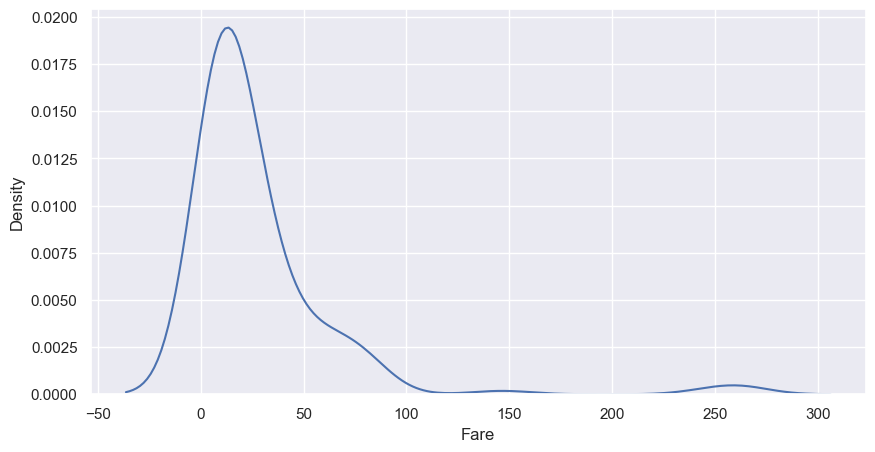

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"], hist = False);

In [16]:
titanic_df[titanic_df['Fare'] > 150]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


#### Histograma
También podemos verlo en un histograma

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Los histogramas dan la frecuencia de aparición de todos los valores. Muy similar al diagrama de densidad anterior. La diferencia es que ahora el eje y es un conteo y no la probabilidad de aparición de los valores de la variable.

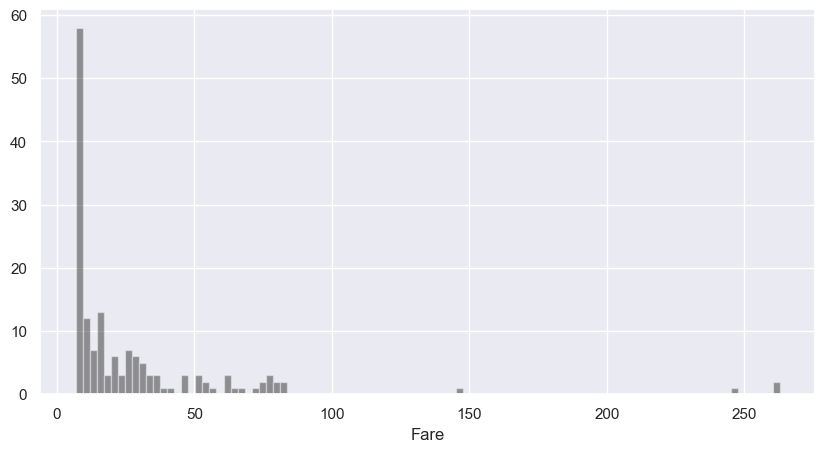

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"],
             kde=False,
             color='black',
             bins=100);
# plt.xlim(0,30)

Podemos agrupar (visualmente) una variable numérica. Podría ser una posible categorización de los billetes

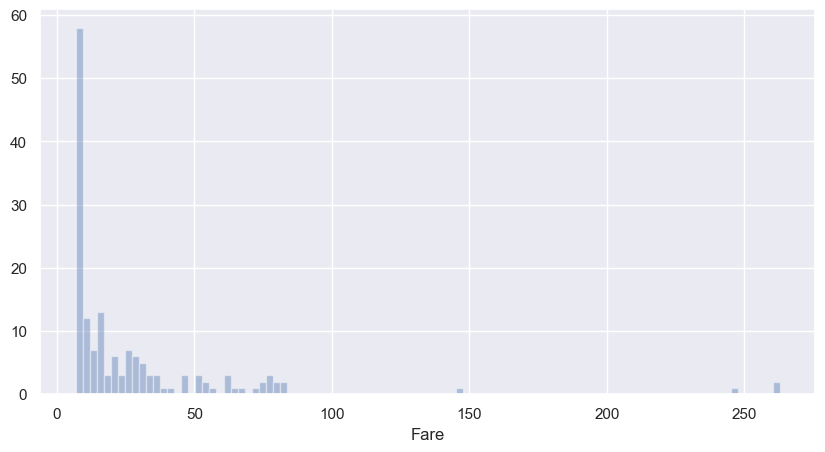

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"],
             kde=False,
            bins=100);

#### Histograma + Densidad

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

<Axes: xlabel='Fare', ylabel='Density'>

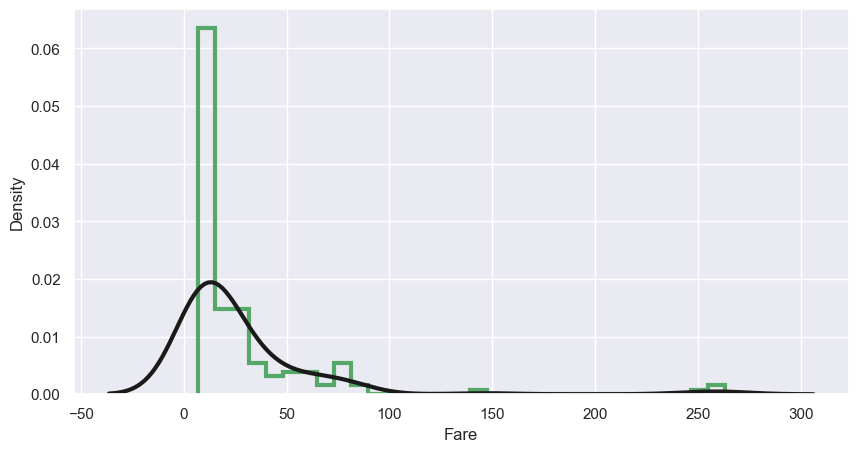

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"})

Otra manera muy visual de ver la concentración de los valores es mediante el argumento `rug`

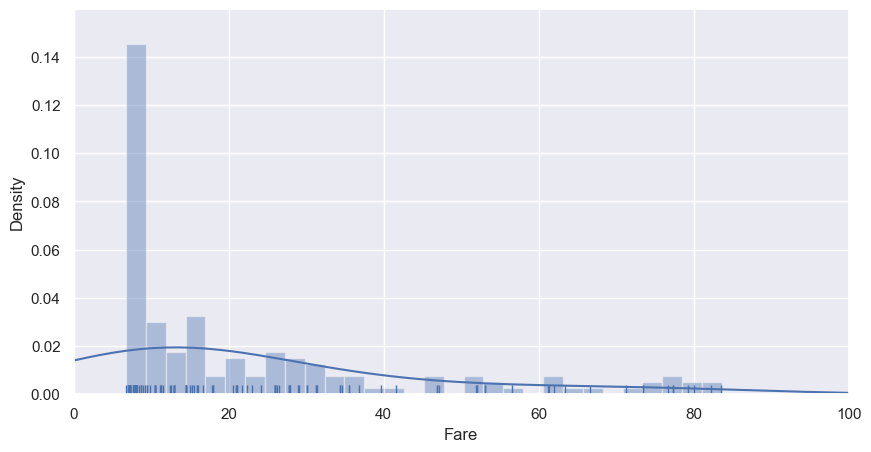

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"],
            rug=True,
            bins=100)
plt.xlim(0, 100);

#### Boxplot

[Colores de Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[Boxlot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

Los boxplots dan una información muy parecida a los gráficos vistos anteriormente, aunque en este caso destaca mucho más los outliers.

In [21]:
p_0 = np.percentile(titanic_df["Fare"], 0) #Q0 #Min
p_25 = np.percentile(titanic_df["Fare"], 25) #Q1
p_50 = np.percentile(titanic_df["Fare"], 50) #Q2 #Mediana
p_75 = np.percentile(titanic_df["Fare"], 75) #Q3
p_100 = np.percentile(titanic_df["Fare"], 100) #Q4 #Max

print("Valor del percentil 0:", p_0)
print("Valor del percentil 25:", p_25)
print("Valor del percentil 50:", p_50)
print("Valor del percentil 75:", p_75)
print("Valor del percentil 100:", p_100)
print("Valor media:", round(titanic_df["Fare"].mean(),2) )

Valor del percentil 0: 6.75
Valor del percentil 25: 8.00315
Valor del percentil 50: 14.4542
Valor del percentil 75: 30.37185
Valor del percentil 100: 263.0
Valor media: 28.11


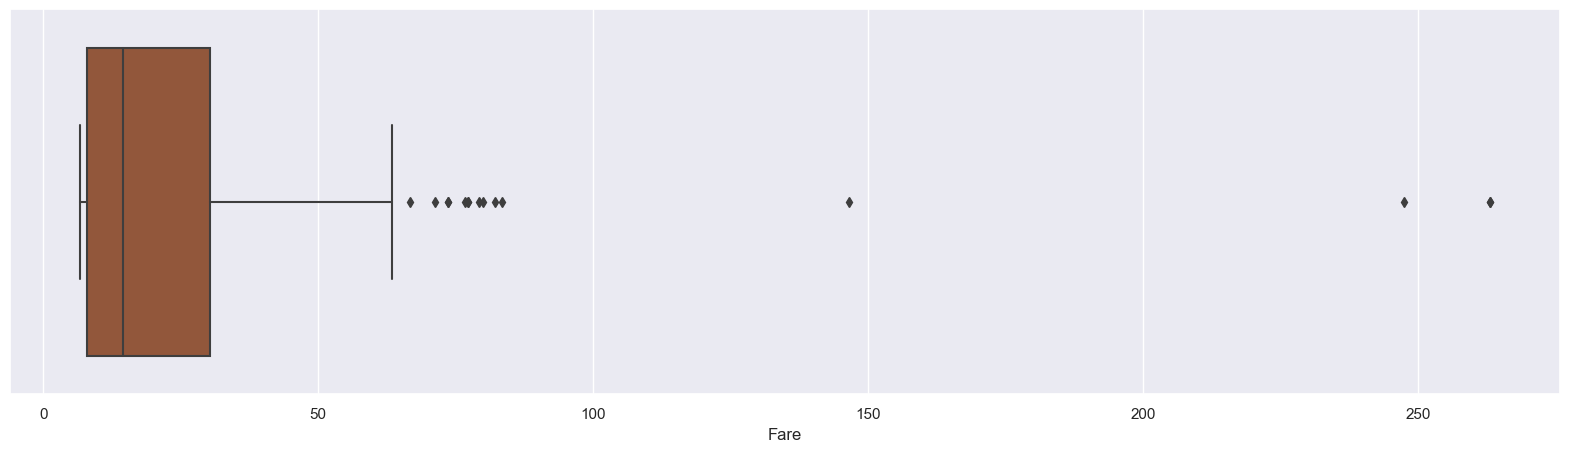

In [22]:
plt.figure(figsize=(20,5))
sns.boxplot(x=titanic_df["Fare"], color="sienna");
# plt.xlim(0,50)

In [23]:
titanic_df[(titanic_df['Fare'] > 50) & (titanic_df['Fare'] < 100)].groupby('Sex').mean(numeric_only = True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,54.6000,1.000,1.00,36.4000,0.8000,0.0000,69.542500
male,89.3125,0.125,1.25,38.1875,0.4375,0.3125,66.235675


![imagen](./img/boxplot.png)

#### Violinplot

[Colores de Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

Igual que un diagrama de caja, pero en este caso tiene la función de distribución en lugar de la propia caja

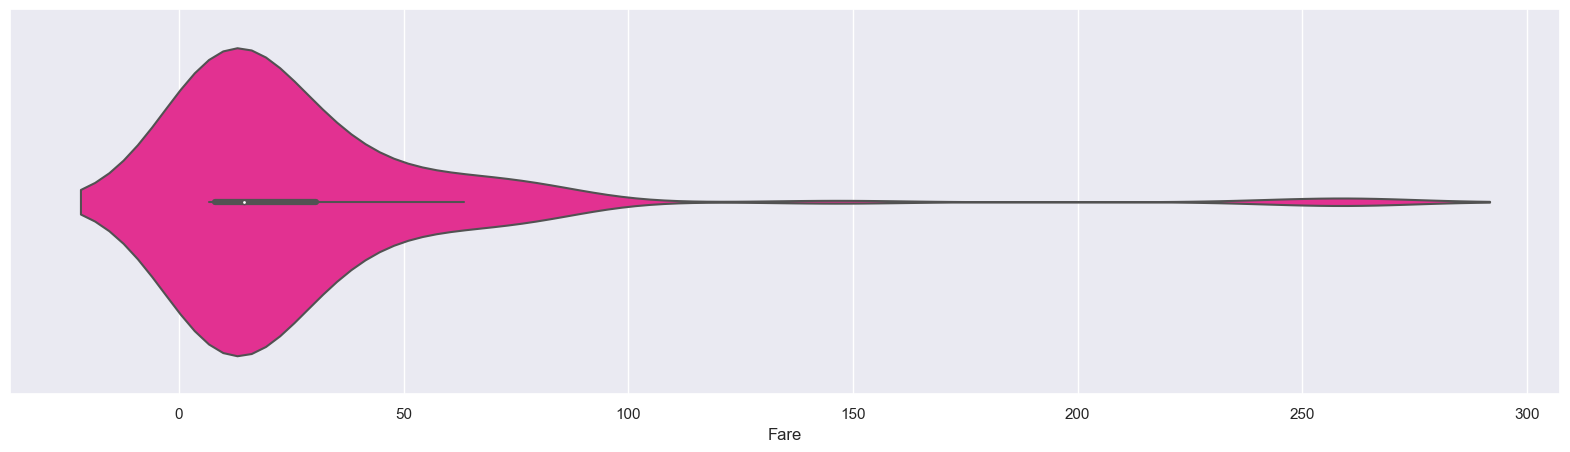

In [24]:
plt.figure(figsize=(20,5))
sns.violinplot(x = titanic_df["Fare"], color='deeppink');

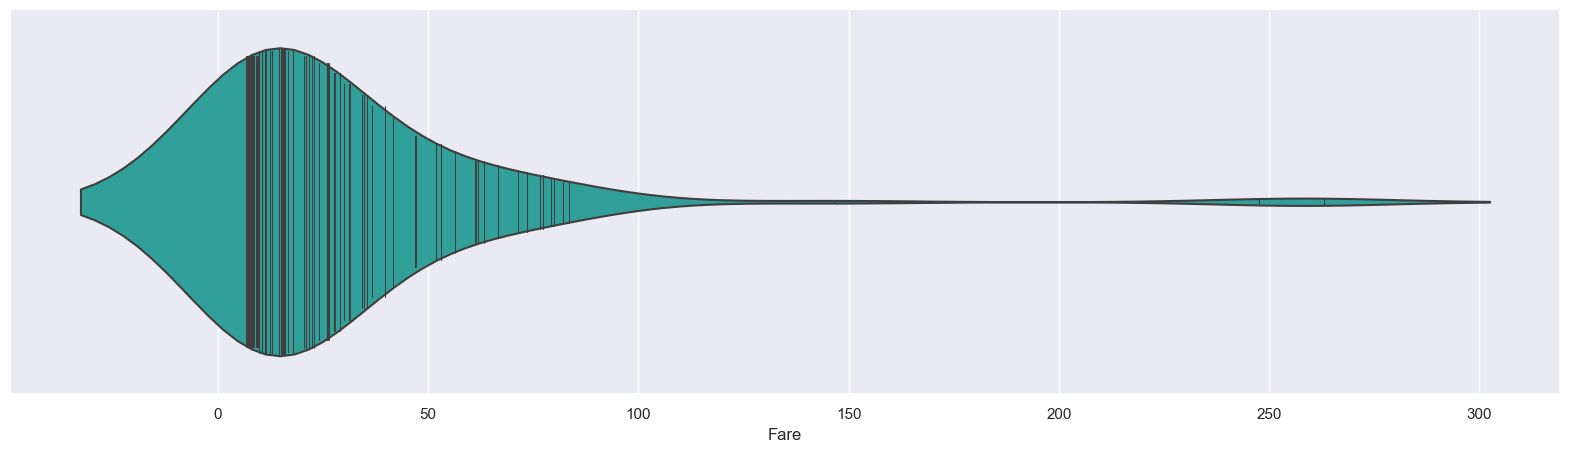

In [25]:
plt.figure(figsize=(20,5))
sns.violinplot(x = titanic_df["Fare"], color='lightseagreen', bw=.5, inner="stick");

### 1.2 Variables cualitativas
Para representar una variable categórica tendremos que ver su frecuencia de valores

En este caso vamos a ver qué tipo de embarque ha sido el más frecuente.

[Documentacion](https://seaborn.pydata.org/generated/seaborn.countplot.html)

In [26]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

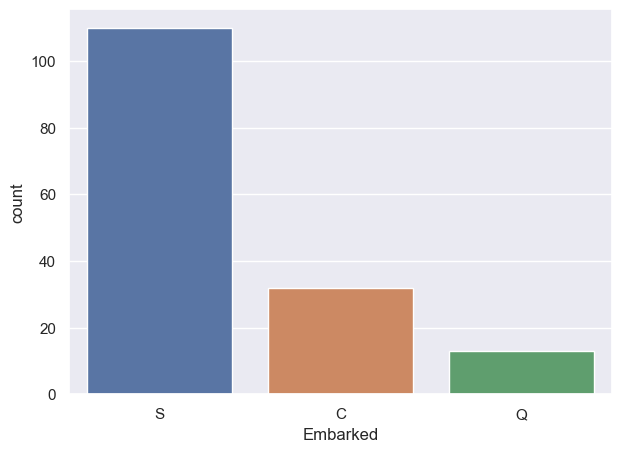

In [27]:
plt.figure(figsize=(7,5))
sns.countplot(x=titanic_df["Embarked"]);

In [28]:
titanic_df[titanic_df['Embarked'] == 'Q']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q


#### Lollipop

¿Cuáles han sido los productos más pedidos?

[Documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hlines.html)

In [29]:
# conteo

In [30]:
market_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [31]:
market_df['Product line'].value_counts(ascending=False)

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

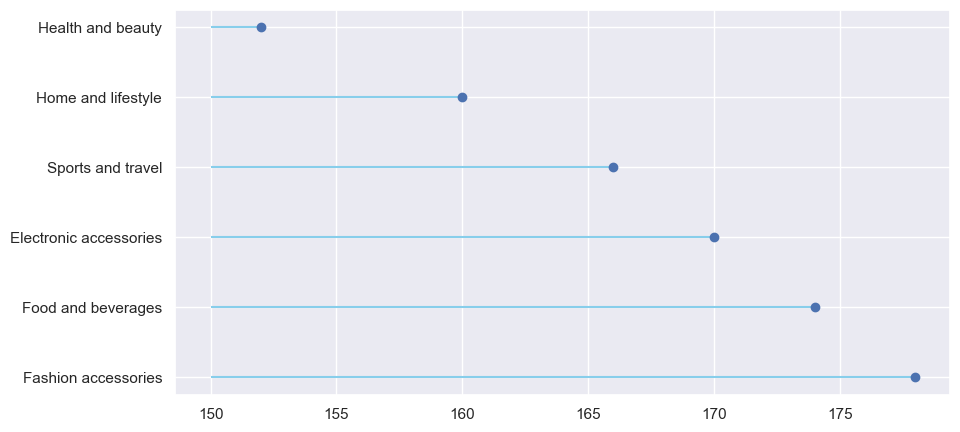

In [32]:
conteo = market_df['Product line'].value_counts(ascending=False)

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index,
           xmin=150,
           xmax=conteo,
           color='skyblue')
plt.plot(conteo, conteo.index, "o");


#### Donut chart/Pie chart

[Documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)

In [33]:
titanic_df["Embarked"].value_counts()

Embarked
S    110
C     32
Q     13
Name: count, dtype: int64

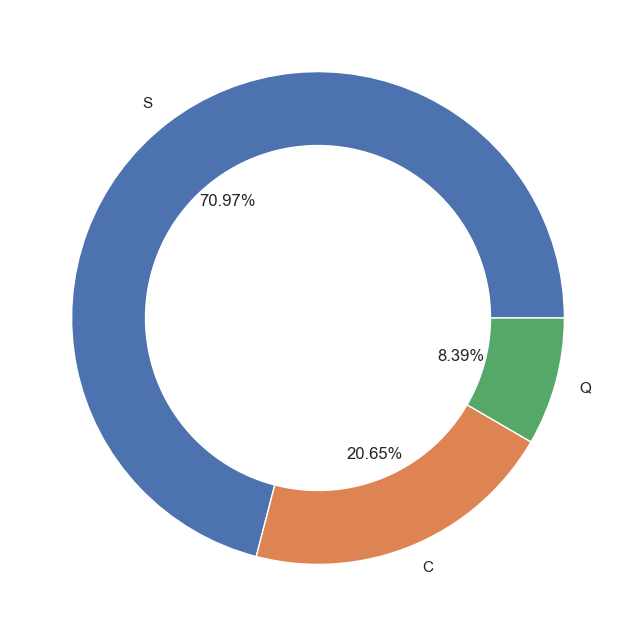

In [34]:
import matplotlib.pyplot as plt
 
# create data
data = titanic_df["Embarked"].value_counts()
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0),
                     0.7, # Grosor del donut
                     color='white')

plt.figure(figsize=(8,8))

plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%');

p=plt.gcf()
p.gca().add_artist(my_circle);

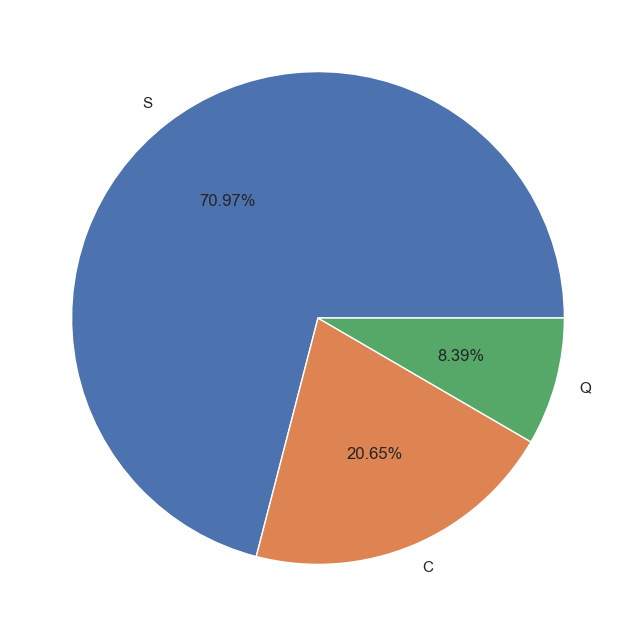

In [35]:
plt.figure(figsize=(8,8))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
p=plt.gcf();

## 2. Análisis Bivariante
### 2.1 Comparativa de variables cuantitativas (2-4 variables)
#### Boxplot

En este ejemplo veremos cómo de diferentes son las distribuciones de las 4 características que definen a una flor.

[Boxlot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

In [36]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
iris_df.columns.values[0:4]

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

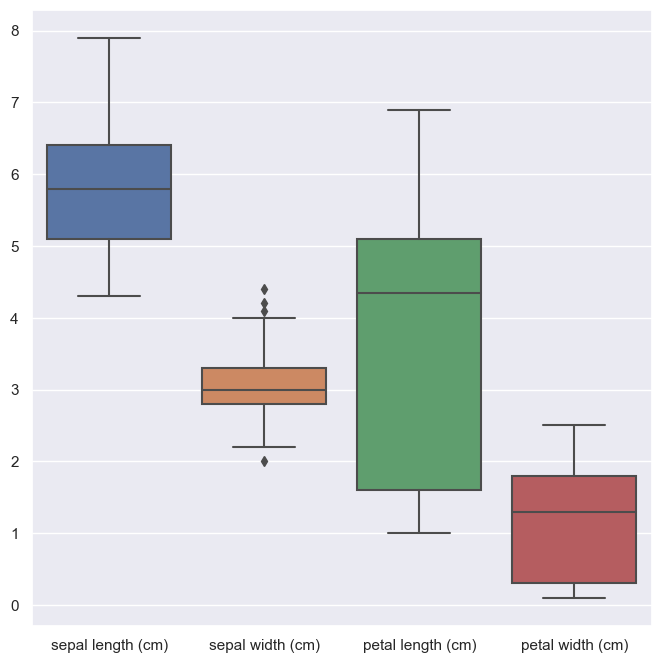

In [38]:
plt.figure(figsize=(8,8))
sns.boxplot(data=iris_df[iris_df.columns.values[0:4]]);

El boxplot está bien, pero haay algo de información que se nos escapa

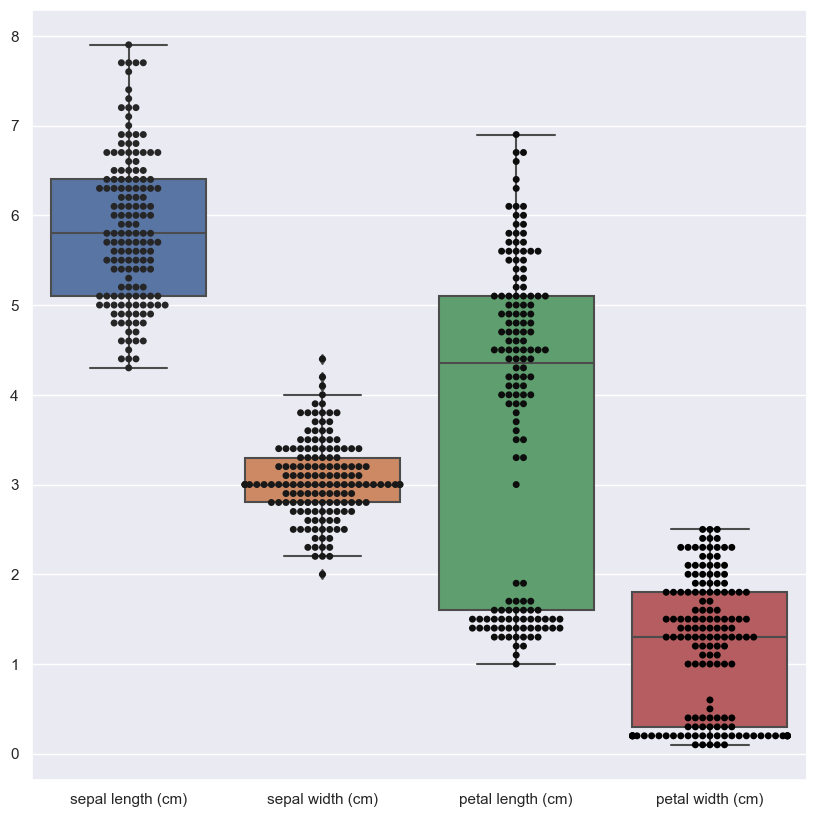

In [39]:
plt.figure(figsize=(10,10))
sns.boxplot(data=iris_df[iris_df.columns.values[0:4]])
sns.swarmplot(data=iris_df[iris_df.columns.values[0:4]],
             color="black", edgecolor="gray");

#### Diagramas de densidad

Otra manera de ver cómo se distribuyen las características de las flores.

[Documentación](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

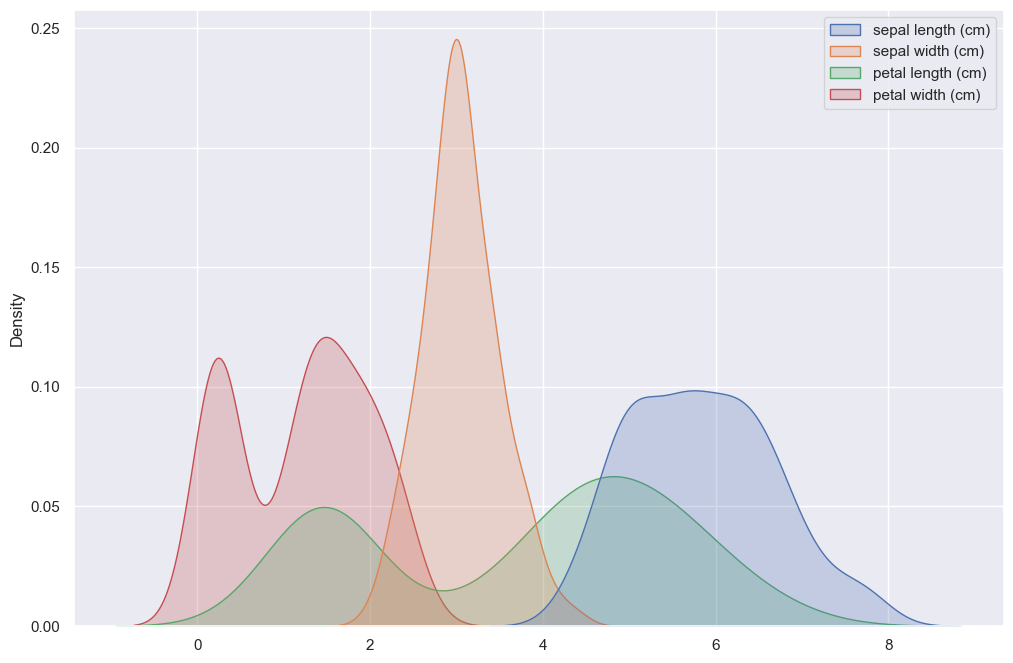

In [40]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=iris_df[iris_df.columns.values[0:4]], shade=True);

#### Histogramas

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

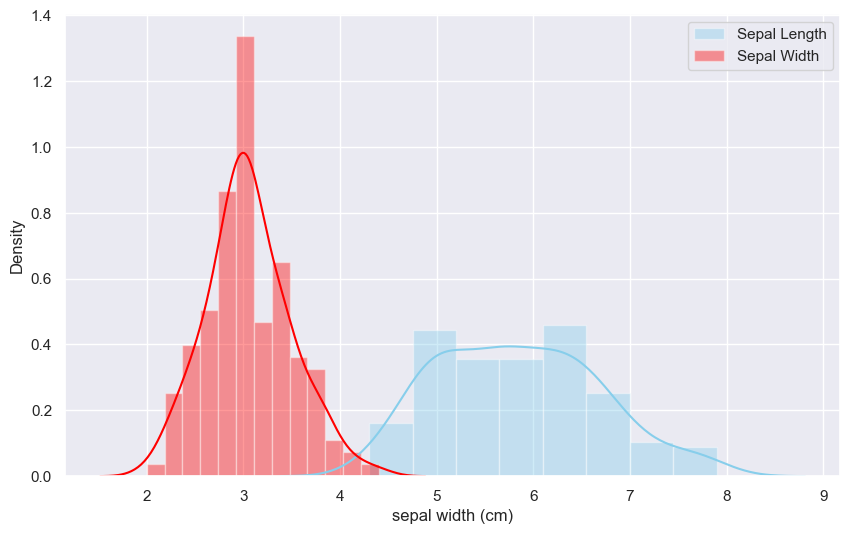

In [41]:
plt.figure(figsize=(10,6))
sns.distplot(iris_df["sepal length (cm)"] , color="skyblue", label="Sepal Length")
sns.distplot(iris_df["sepal width (cm)"] , color="red", label="Sepal Width")
plt.legend();

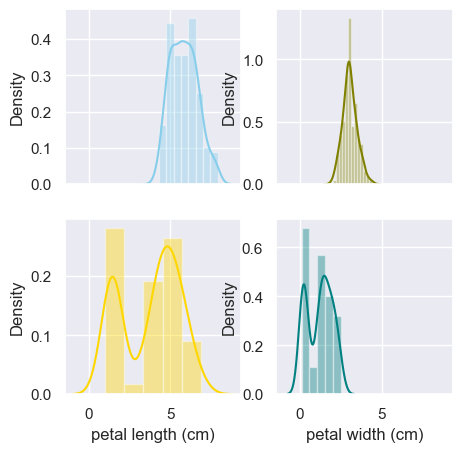

In [42]:
f, axes = plt.subplots(2, 2, figsize=(5,5), sharex=True)
sns.distplot(iris_df["sepal length (cm)"] , color="skyblue", ax=axes[0, 0])
sns.distplot(iris_df["sepal width (cm)"] , color="olive", ax=axes[0, 1])
sns.distplot(iris_df["petal length (cm)"] , color="gold", ax=axes[1, 0])
sns.distplot(iris_df["petal width (cm)"] , color="teal", ax=axes[1, 1]);

#### Scatter plot

En este ejemplo se ve claramente cómo estas dos variables sirven para distinguir las setosas de los otros tipos

[Documentación](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

In [43]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
iris_df['Target'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

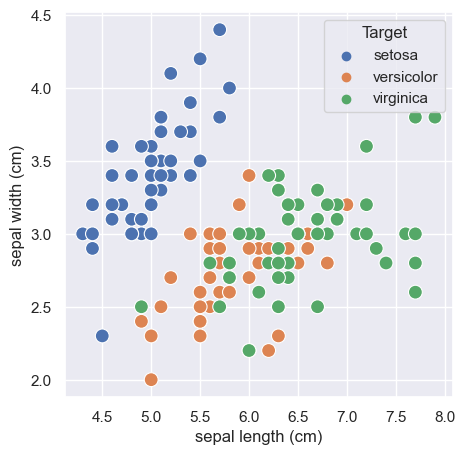

In [45]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=iris_df['sepal length (cm)'],
                y=iris_df['sepal width (cm)'],
                hue = iris_df['Target'],
               s=100);

[Documentación dataset](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

[Documentación jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

In [46]:
# print(load_boston()['DESCR']) -- No ejecutar

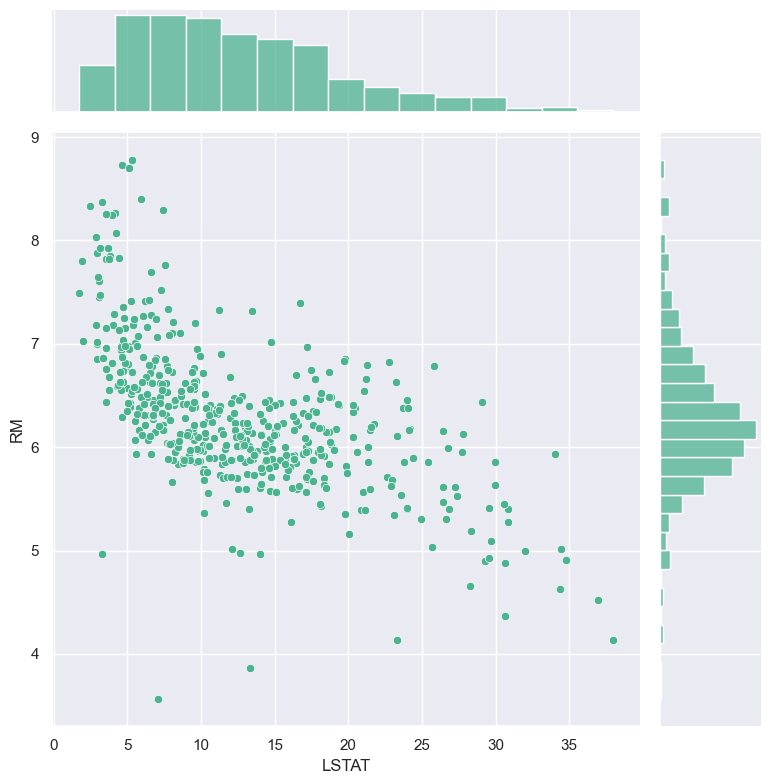

<Figure size 500x500 with 0 Axes>

In [47]:
sns.jointplot(x=boston_df['LSTAT'],
              y=boston_df['RM'],
              color="#4CB391",
             height = 8)
plt.figure(figsize=(5, 5));

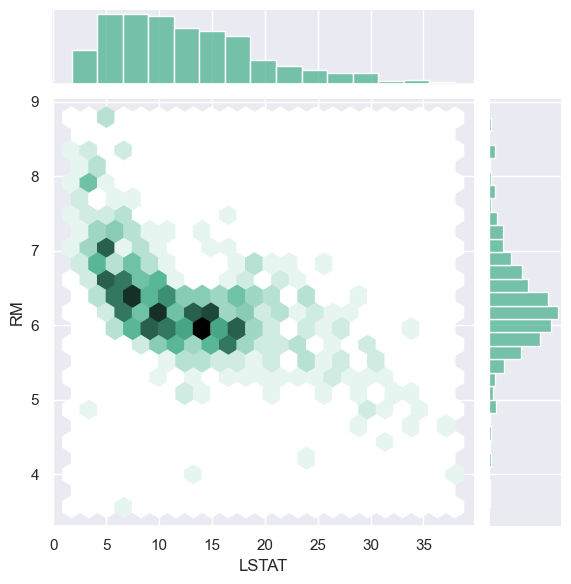

In [48]:
sns.jointplot(x=boston_df['LSTAT'],
              y=boston_df['RM'],
              kind="hex",
              color="#4CB391");

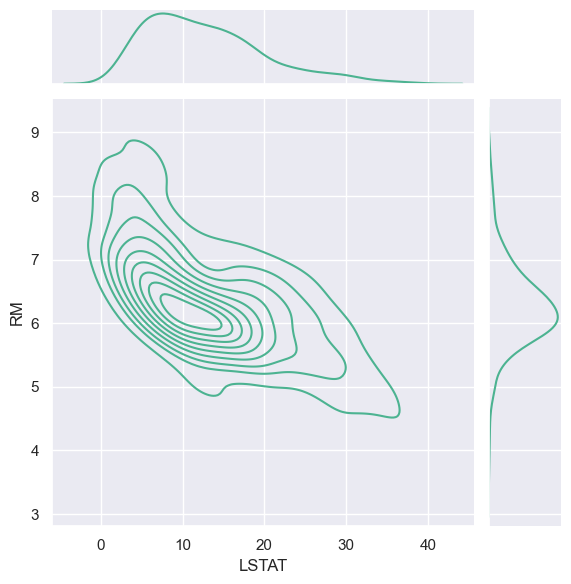

In [49]:
sns.jointplot(x=boston_df['LSTAT'],
              y=boston_df['RM'],
              kind="kde",
              color="#4CB391");

### 2.2 Comparativa de múltiples numéricas

#### Heatmaps

Los heatmaps son perfectos para representar una matriz de correlación

[Documentación heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

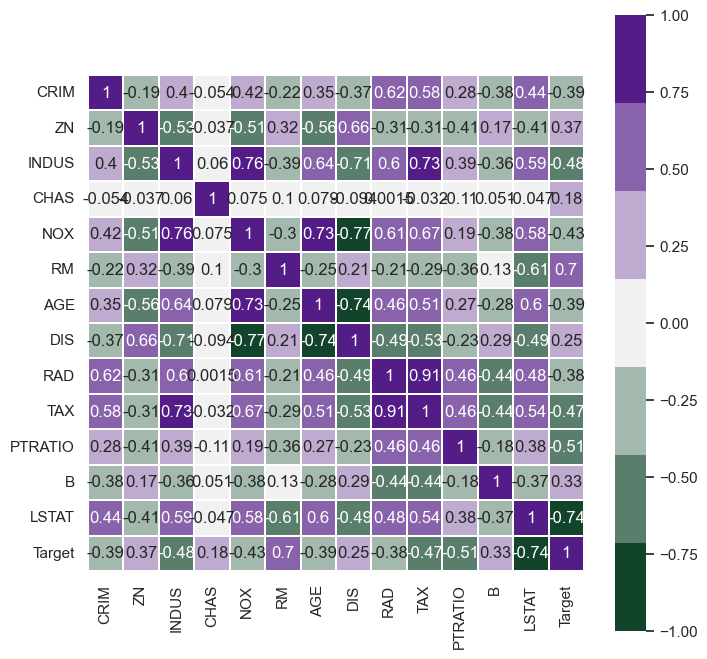

In [50]:
plt.figure(figsize=(8,8))
sns.heatmap(boston_df.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

In [51]:
# print(load_boston()['DESCR']) -- No ejecutar

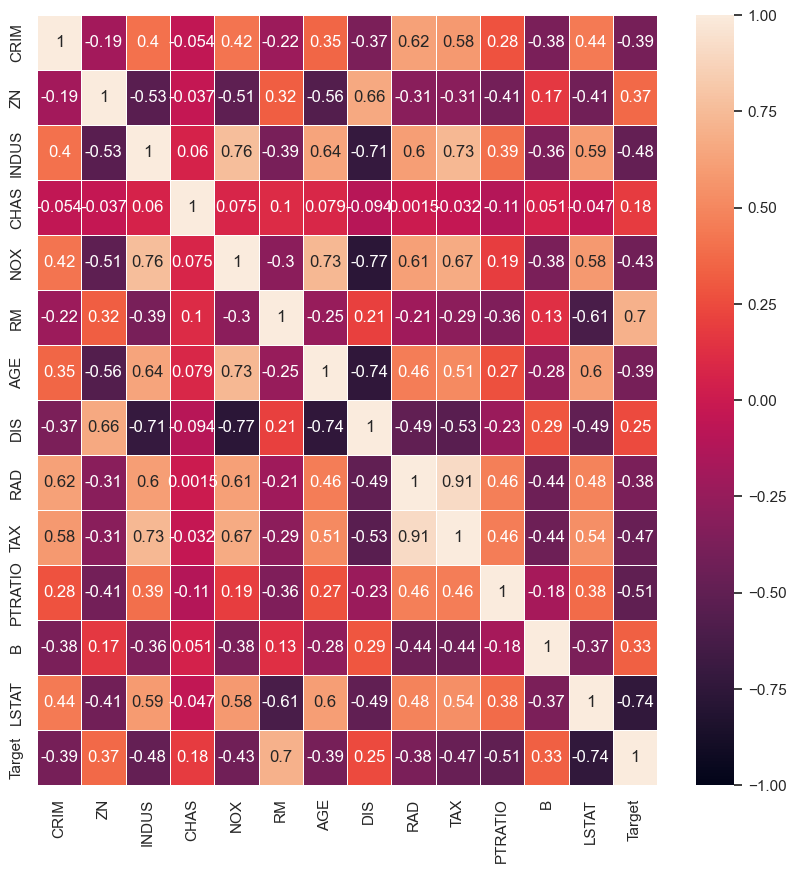

In [52]:
# EJEMPLO DE MALA ESCALA DE COLORES
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(boston_df.corr(),
            annot=True,
            linewidths=.5,
            ax=ax,
            vmin=-1,
            vmax=1);

También nos permite comparar una variable numérica vs dos variables categóricas. Por ejemplo la cantidad de suicidios desagregado por edades y paises.

Se recomienda que las dos variables categóricas tengan pocos casos, porque sino no se va a ver bien el heatmap.

In [53]:
suicid_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [54]:
data = suicid_df.groupby(['country', 'age']).sum()['suicides_no'].unstack()
data = data.loc[['Italy', 'Spain', 'Portugal', 'Belgium', 'Czech Republic']]

In [55]:
data

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
country,,,,,,
Italy,8571.0,16115.0,39250.0,400.0,43314.0,24410.0
Spain,7559.0,13373.0,30331.0,354.0,29807.0,18778.0
Portugal,1505.0,2590.0,6535.0,85.0,8189.0,5157.0
Belgium,4475.0,8731.0,24300.0,216.0,16887.0,8152.0
Czech Republic,3596.0,5498.0,16885.0,174.0,12042.0,5492.0


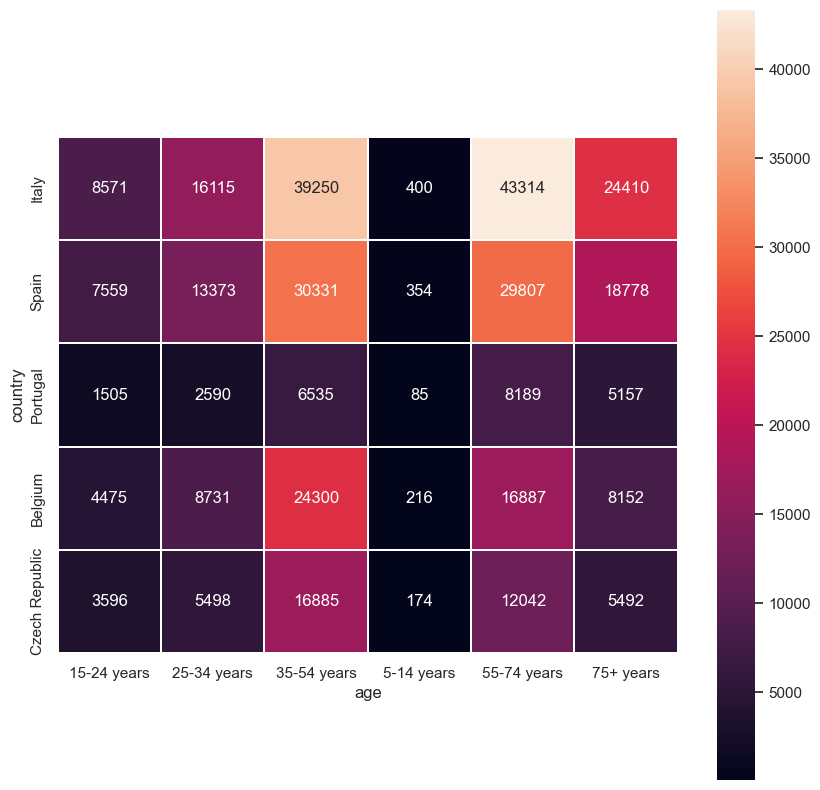

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(data,
            square=True,
            linewidths=.3,
            annot=True,
            fmt='g');

#### Correlograma

[Documentación Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Interesante gráfica para ver en un dataset qué variables presentan correlación lineal, así como sus distribuciones. NO realices esta gráfica con muchas variables porque no se va a ver bien. Hazlo por partes.

In [57]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


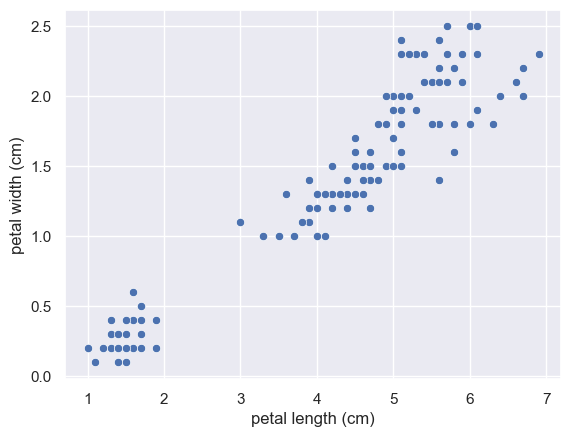

In [58]:
sns.scatterplot(x = iris_df['petal length (cm)'], y = iris_df['petal width (cm)']);


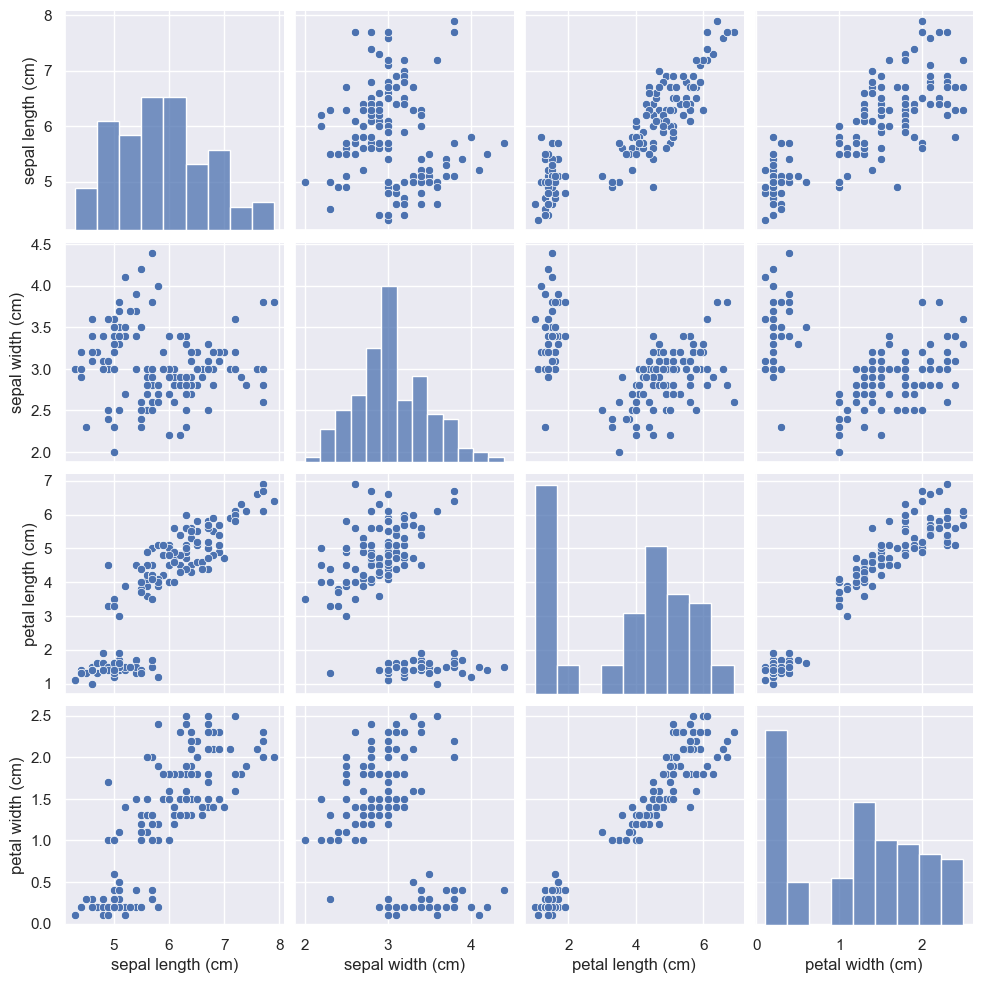

In [59]:
sns.pairplot(iris_df);

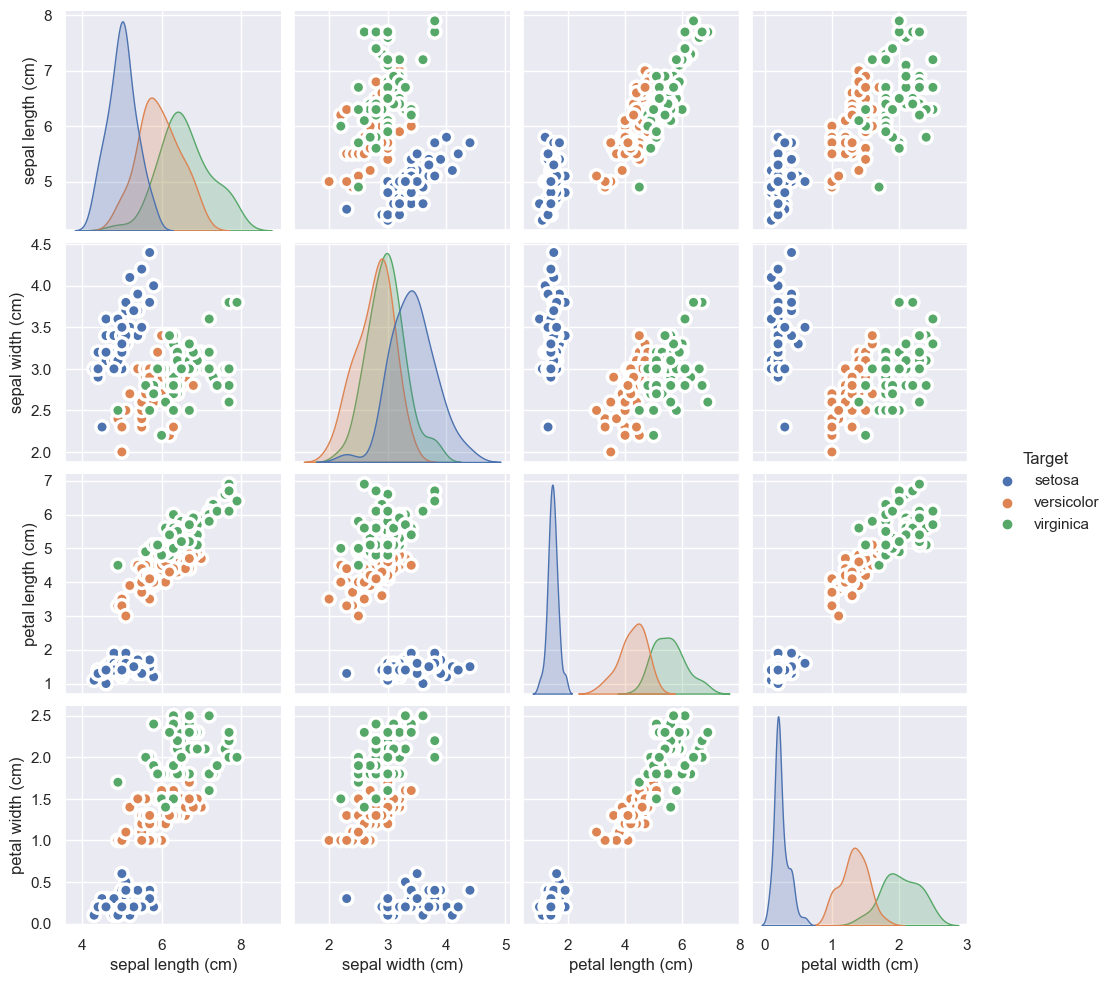

In [60]:
sns.pairplot(iris_df,
             kind="scatter",
             hue="Target",
             plot_kws=dict(s=80, edgecolor="white",
                           linewidth=2.5));

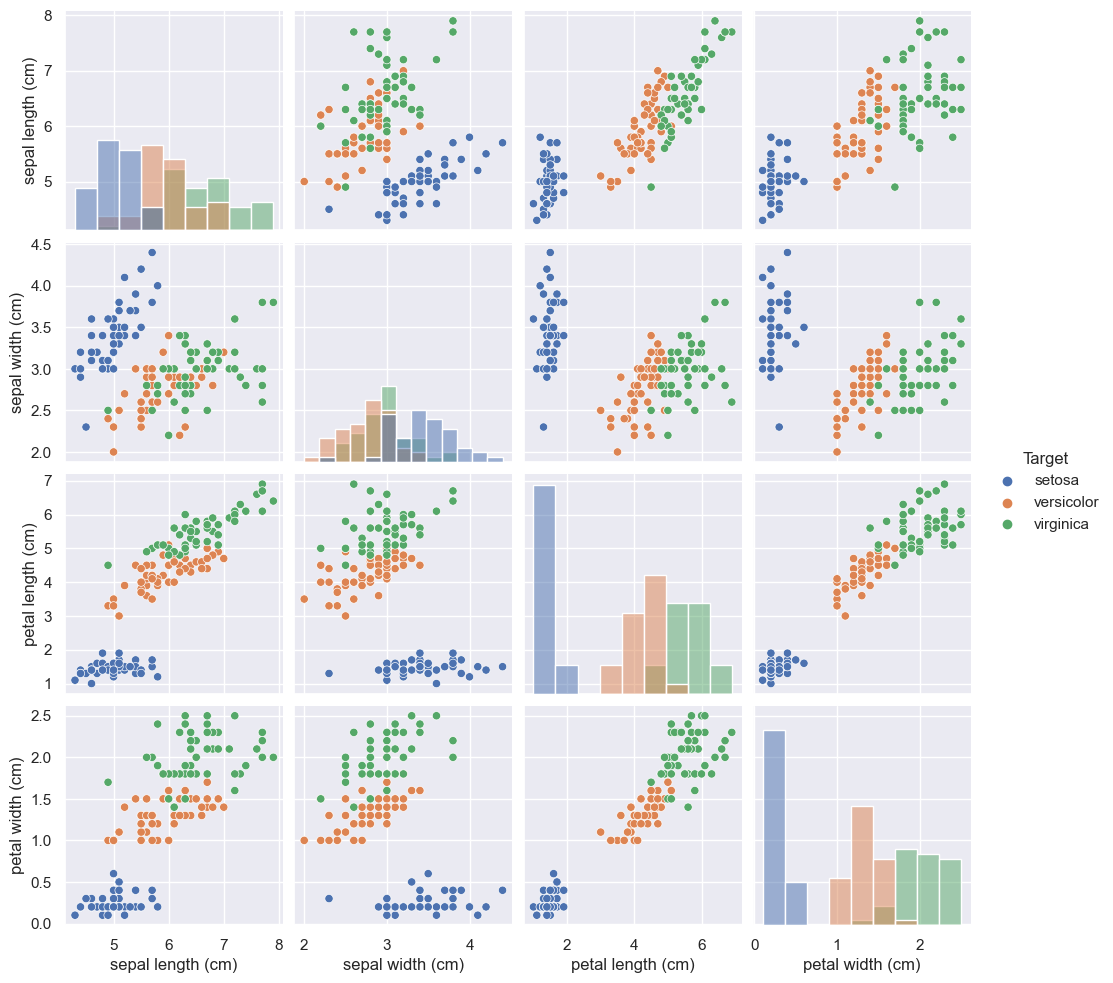

In [61]:
sns.pairplot(iris_df,
             kind="scatter",
             hue="Target",
             diag_kind="hist");

### 2.3 Comparativa de dos variables cualitativas
#### Tabla

[Documentacion](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

Lo más sencillo, una tabla con la frecuencia de valores. Esto es factible cuando los elementos únicos por categoría no son muchos.

In [62]:
pd.crosstab(titanic_df["Embarked"],
            titanic_df["Sex"],
            margins = False) 

Sex,female,male
Embarked,,
C,11,21
Q,7,6
S,37,73


#### Diagrama de barras

[Documentacion](https://seaborn.pydata.org/generated/seaborn.catplot.html)

En un diagrama de barras también se entiende la representación de dos variables cualitativas

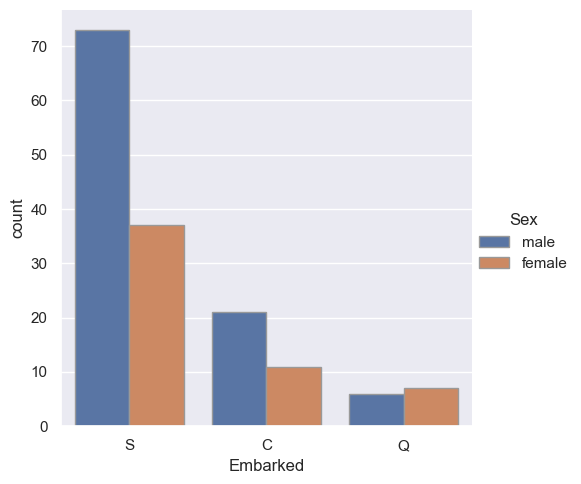

In [63]:
sns.catplot(x="Embarked",
            hue="Sex",
            kind="count",
            edgecolor=".6",
            orient = "V",
            data=titanic_df);

Otra manera de visualizar dos o más variables categóricas

In [64]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Figure size 3000x1000 with 0 Axes>

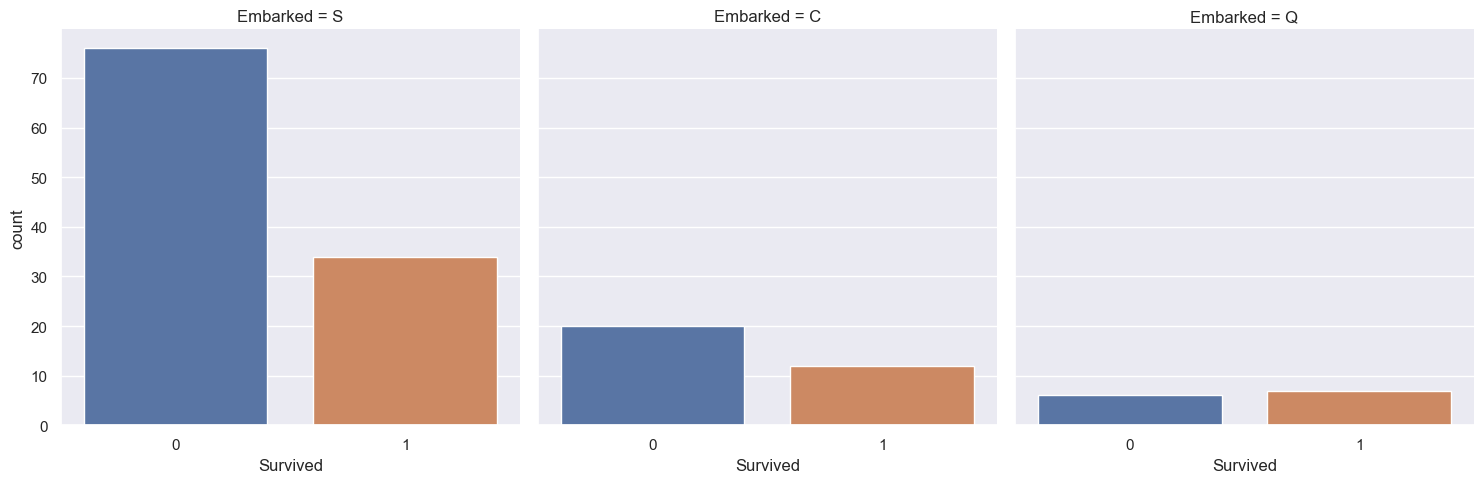

In [65]:
plt.figure(figsize=(30,10));
sns.catplot(x="Survived",
            col="Embarked",
            data=titanic_df,
            kind="count");

In [103]:
titanic_df.groupby(['Embarked','Sex'])['Survived'].sum()

Embarked  Sex   
C         female     8
          male       4
Q         female     7
          male       0
S         female    24
          male      10
Name: Survived, dtype: int64

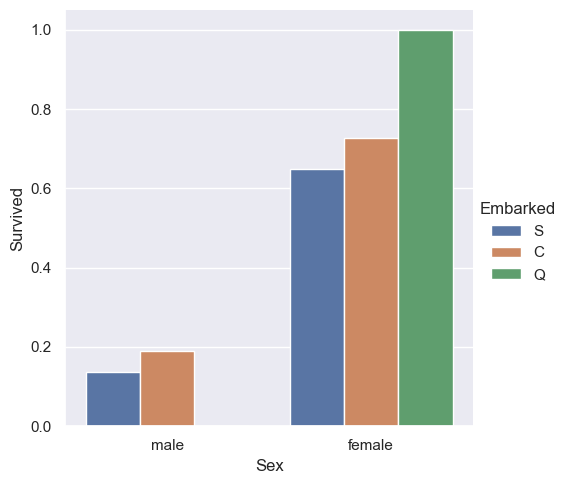

In [105]:
sns.catplot(x="Sex",
            y="Survived",
            hue="Embarked",
            kind="bar",
            data=titanic_df,
            ci=None); # Para que elimine las barras de error

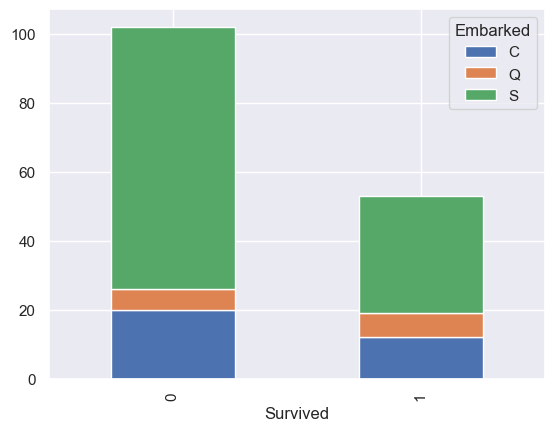

In [68]:
df_plot = titanic_df.groupby(['Embarked', 'Survived']).size().reset_index().pivot(columns='Embarked',
                                                                                  index='Survived',
                                                                                  values=0)
df_plot.plot(kind='bar', stacked=True);

In [106]:
df_plot

Embarked,C,Q,S
Survived,,,
0,20,6,76
1,12,7,34


### 2.4 Cualitativa vs cuantitativa
#### Time series

[Documentacion](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

Las series temporales tienen la particularidad de que son datos ordenados

In [69]:
suicid_df2 = suicid_df[suicid_df['country'].isin(['Spain', 'Germany', 'France'])]
suicid_df2 = suicid_df2.groupby(['country', 'year']).sum()
suicid_df2.reset_index(inplace=True)

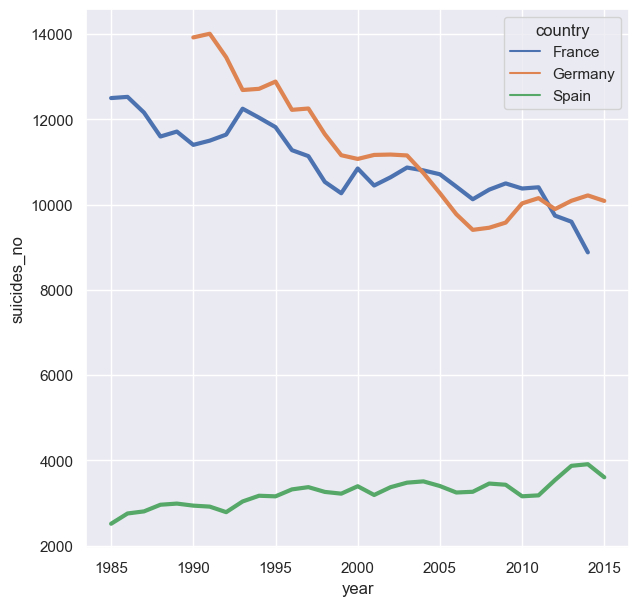

In [70]:
plt.figure(figsize=(7,7))
sns.lineplot(data=suicid_df2,
             x="year",
             y="suicides_no",
             hue="country",
            linewidth = 3);

#### Treemap
Un treemap es una opción muy interesante para mostrar una variable numérica vs una categórica

In [71]:
# !pip install squarify

In [72]:
suicid_df.groupby("country").sum()['suicides_no'].sort_values(ascending=False)[:30]

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Italy                  132060
Mexico                 111139
Thailand               110643
Canada                 107561
Kazakhstan             101546
Spain                  100202
Argentina               82219
Hungary                 73891
Romania                 72777
Australia               70111
Belgium                 62761
Belarus                 59892
Sri Lanka               55641
Colombia                53080
Netherlands             50833
Austria                 50073
Czech Republic          43687
Cuba                    41418
Chile                   40895
Sweden                  37795
Name: suicides_no, dtype: int64

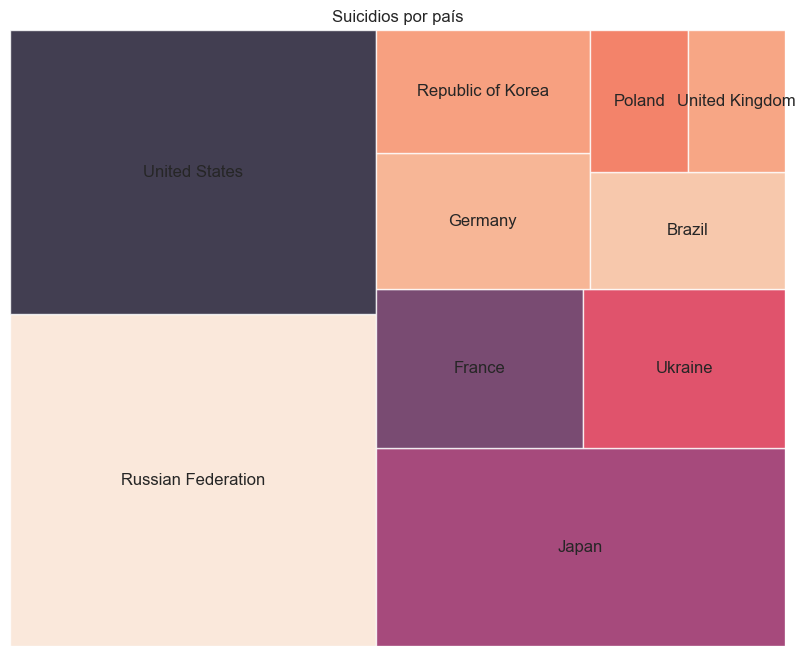

In [73]:
import squarify

data = suicid_df.groupby("country").sum()['suicides_no'].sort_values(ascending=False)[:10]

plt.figure(figsize=(10,8))
squarify.plot(sizes=data.values, label=data.index, alpha=.8 )
plt.axis('off')
plt.title("Suicidios por país")
plt.show()

Con este catplot obtenemos la dispersión de la variable Age, por cada grupo de la categoría.

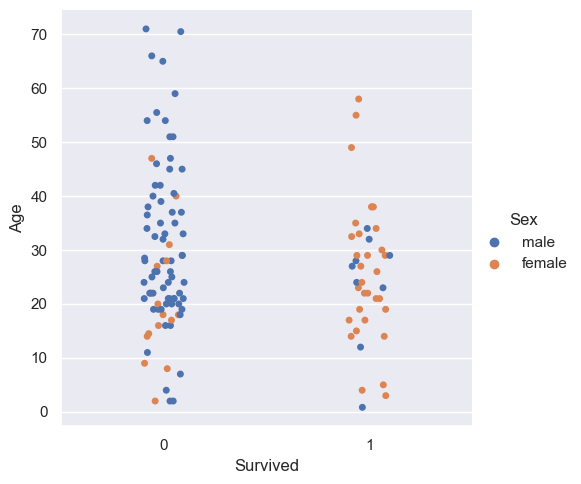

In [74]:
sns.catplot(x="Survived", y="Age", hue="Sex", data=titanic_df);

El equivalente con un diagrama de caja sería el siguiente

In [75]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [76]:
# titanic_df['Survived_string'] = np.where(titanic_df['Survived']==1, 'Superviviente', 'No superviviente')
# titanic_df.head()

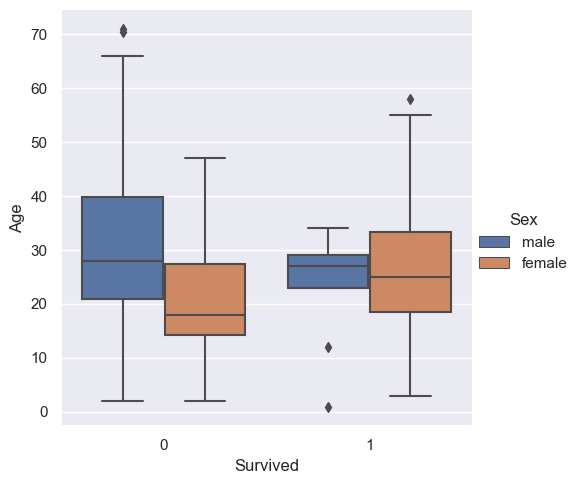

In [77]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="box", data=titanic_df);

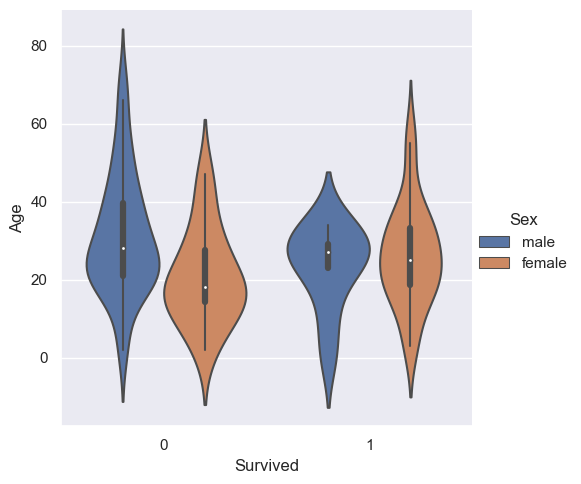

In [78]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="violin", data=titanic_df);

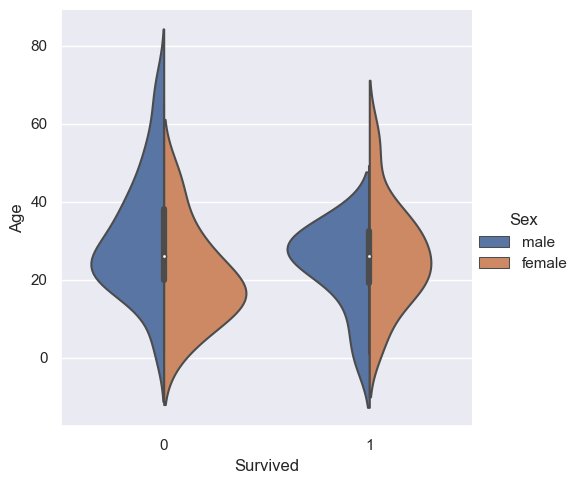

In [79]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="violin", split=True, data=titanic_df);

In [80]:
market_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


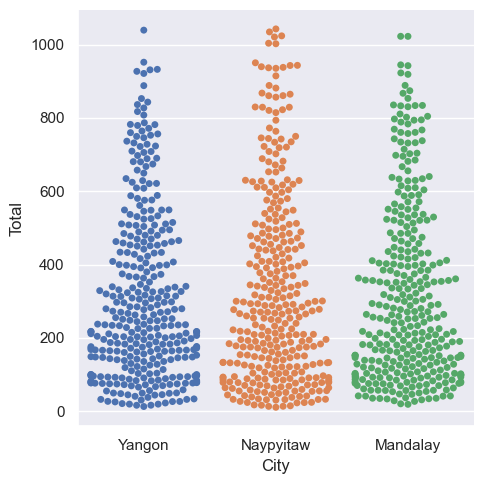

In [81]:
sns.catplot(x="City", y="Total", kind="swarm", data=market_df, hue='City');

In [82]:
market_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


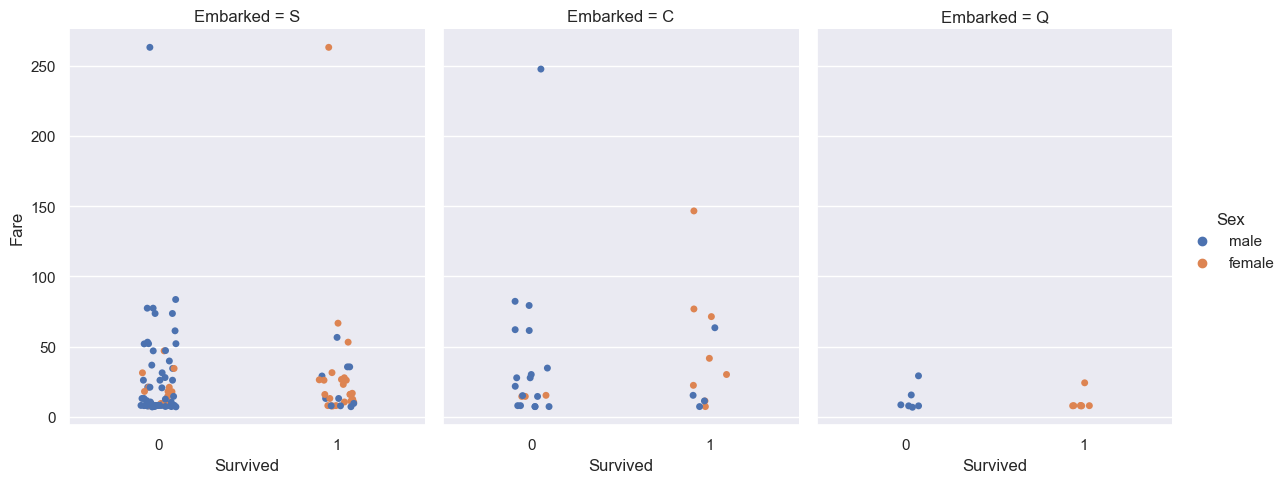

In [83]:
sns.catplot(x="Survived",
            y="Fare",
            hue="Sex",
            col="Embarked",
            data=titanic_df,
            height=5,
            aspect=.8);

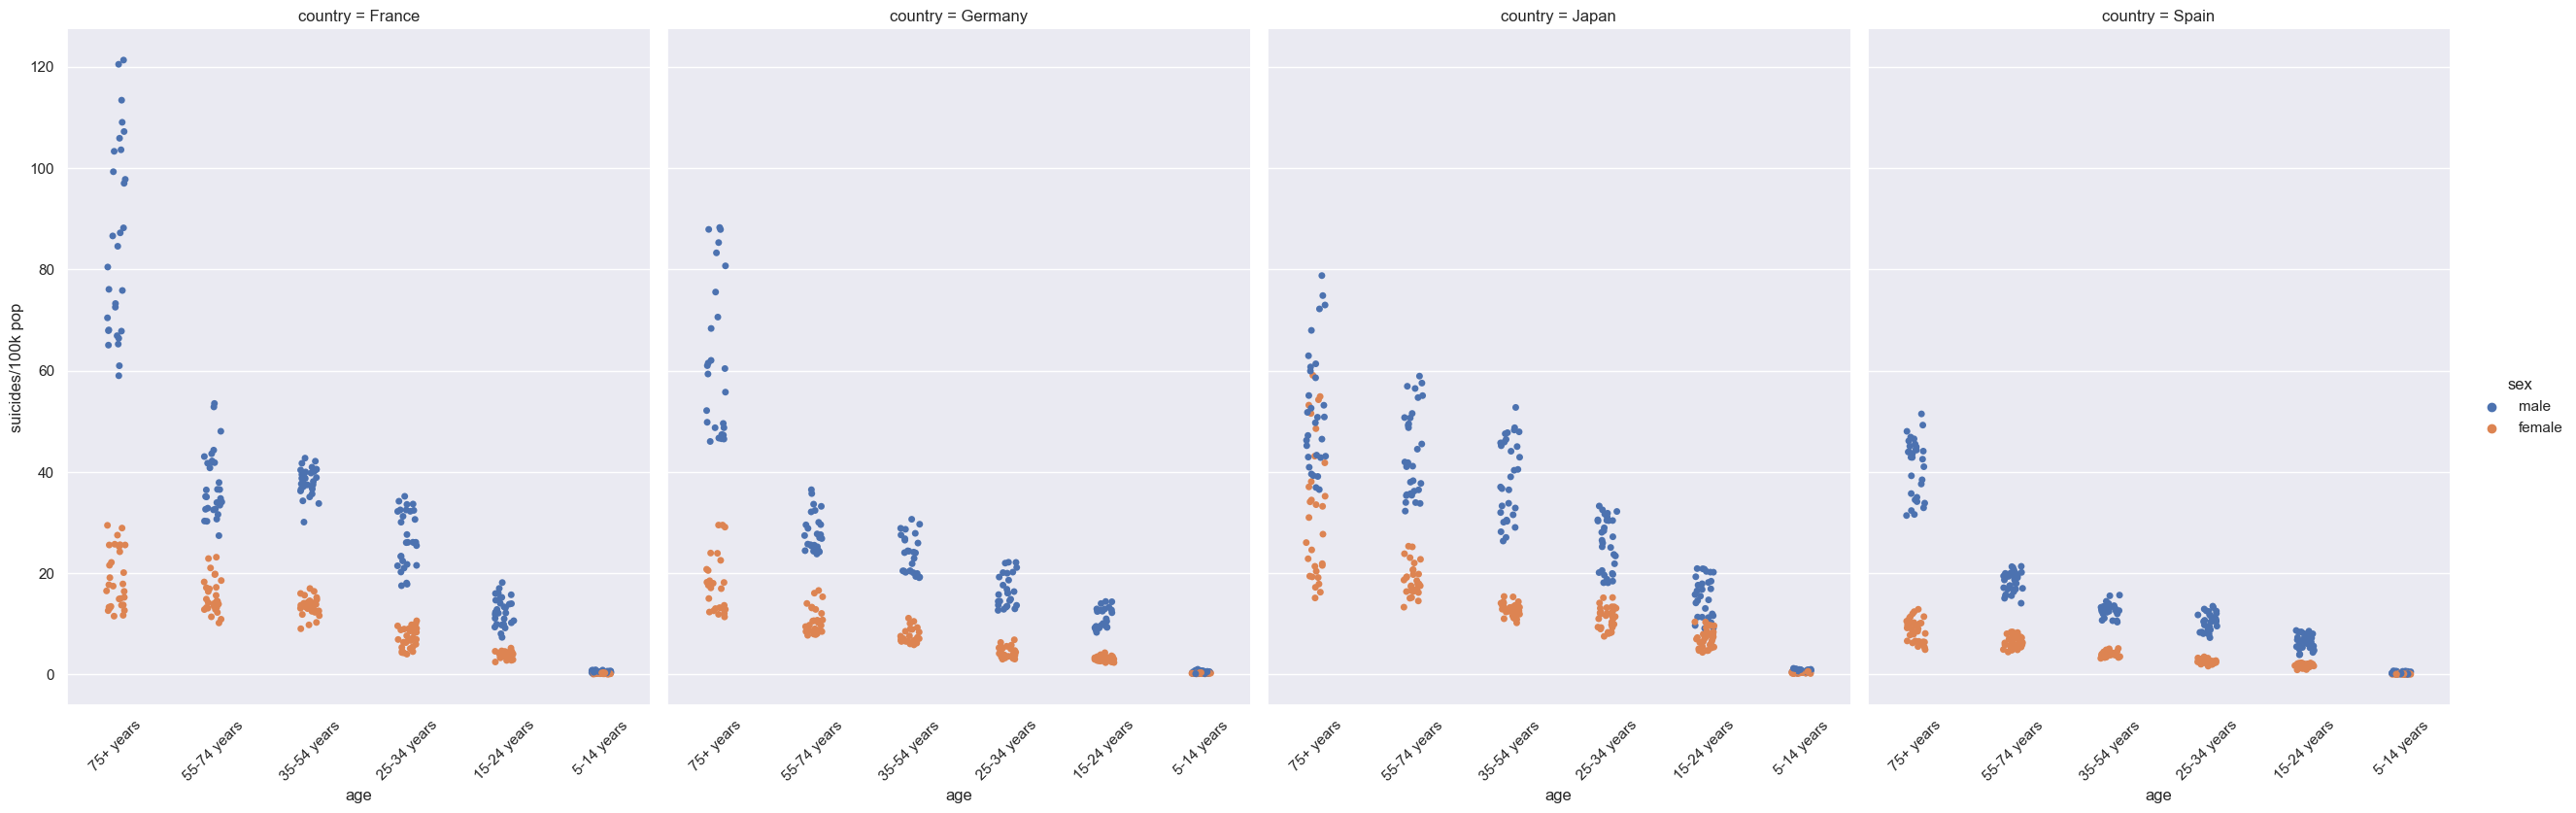

In [84]:
suicid_df2 = suicid_df[suicid_df['country'].isin(['Spain', 'Germany', 'France', 'Japan'])]

chart = sns.catplot(x="age",
            y="suicides/100k pop",
            hue="sex",
            col="country",
            data=suicid_df2,
            height=8,
            aspect=.8)
chart.set_xticklabels(rotation=45);

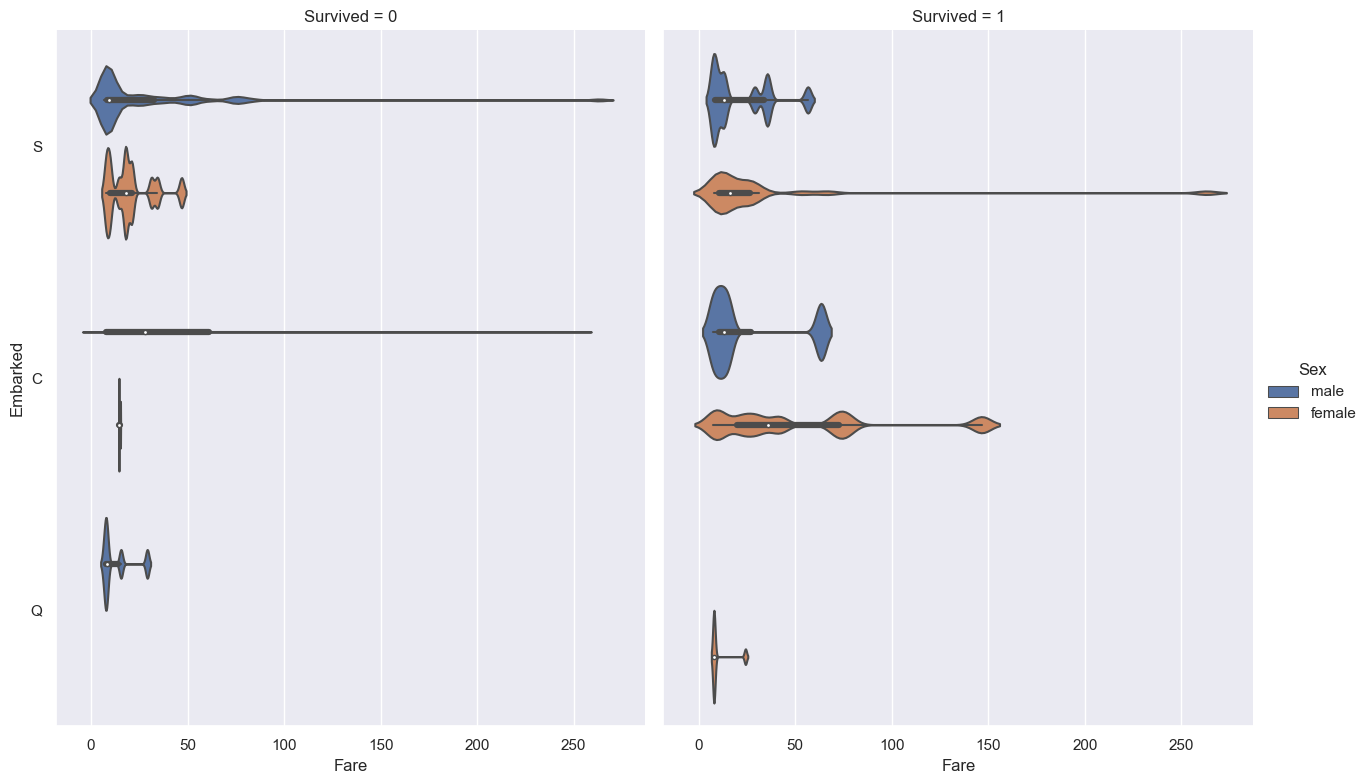

In [85]:
sns.catplot(x="Fare",
            y="Embarked",
            hue="Sex",
            kind="violin",
            col="Survived",
            bw=.1,
            height=8,
            aspect=.8,
            data=titanic_df);

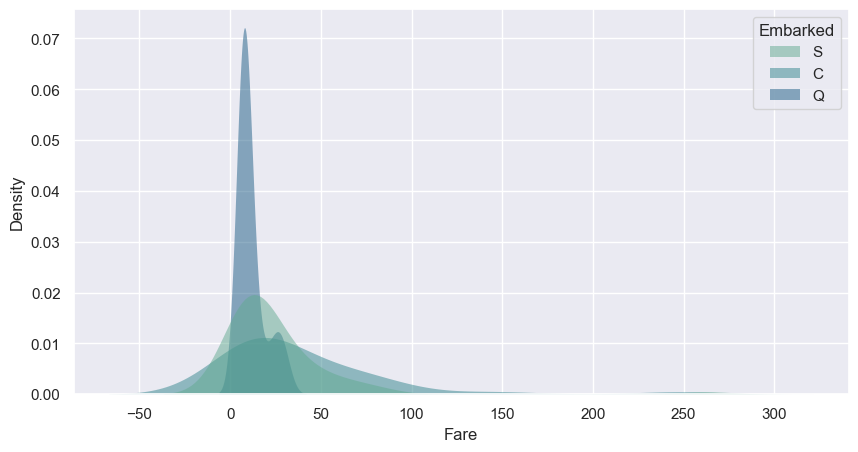

In [86]:
plt.figure(figsize=(10,5))
sns.kdeplot(
   data=titanic_df, x="Fare", hue="Embarked",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
);

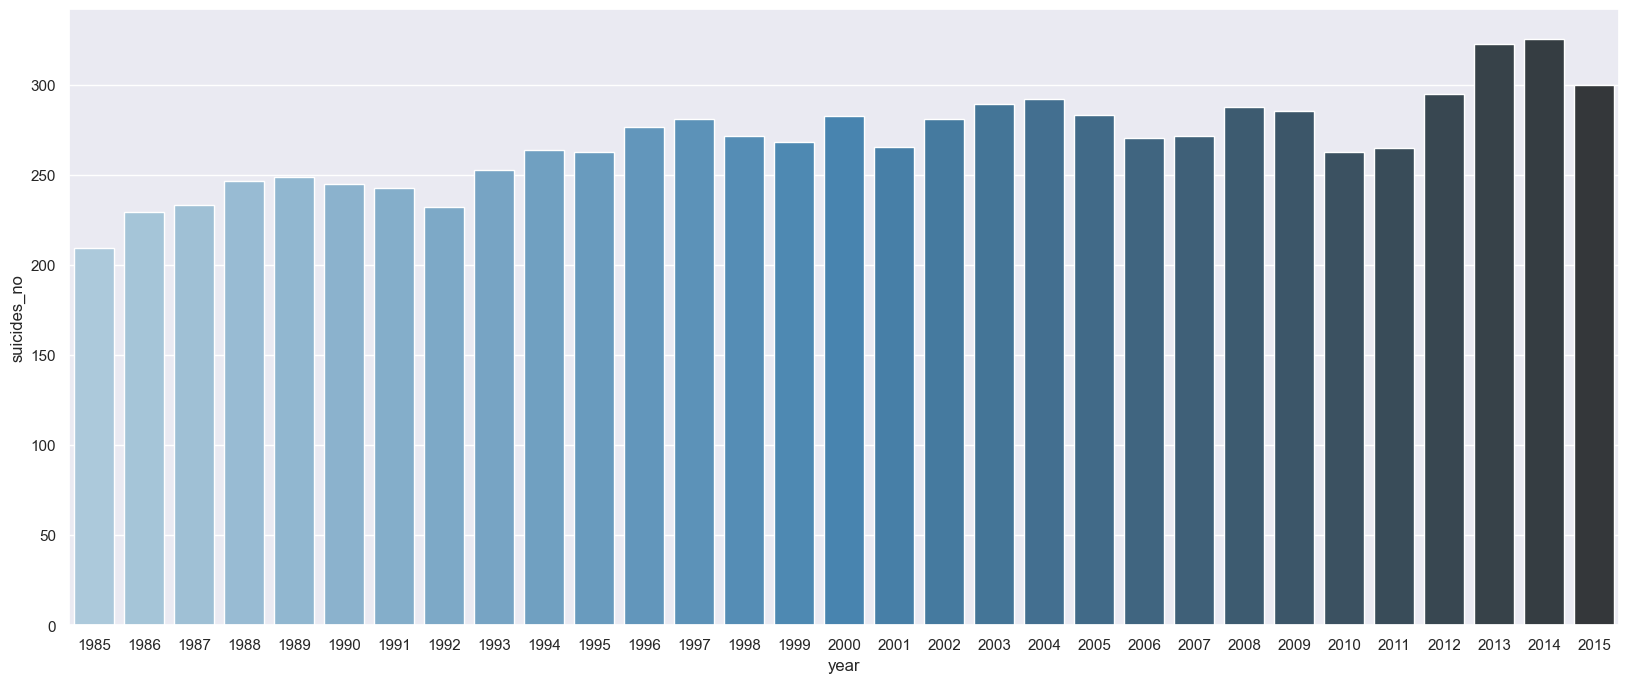

In [87]:
suicid_df2 = suicid_df[suicid_df['country'] == 'Spain']

plt.figure(figsize=(20,8))
sns.barplot(x="year",
            y="suicides_no",
            palette="Blues_d",
            data=suicid_df2,
           ci=None);

In [88]:
# Filter countries with 'gdp_per_capita > 10000
df1 = suicid_df.groupby('country').sum()['suicides_no']
df2 = suicid_df[suicid_df['gdp_per_capita ($)'] > 10000].groupby('country').sum()['suicides_no']
df1 = df1[df1.index.isin(df2.index)]

df_tot = pd.DataFrame({"Tot_suicide": df1, "Suicide_gdp": df2}).sort_values("Tot_suicide", ascending=False)[:20]
df_tot.reset_index(level=0, inplace=True)

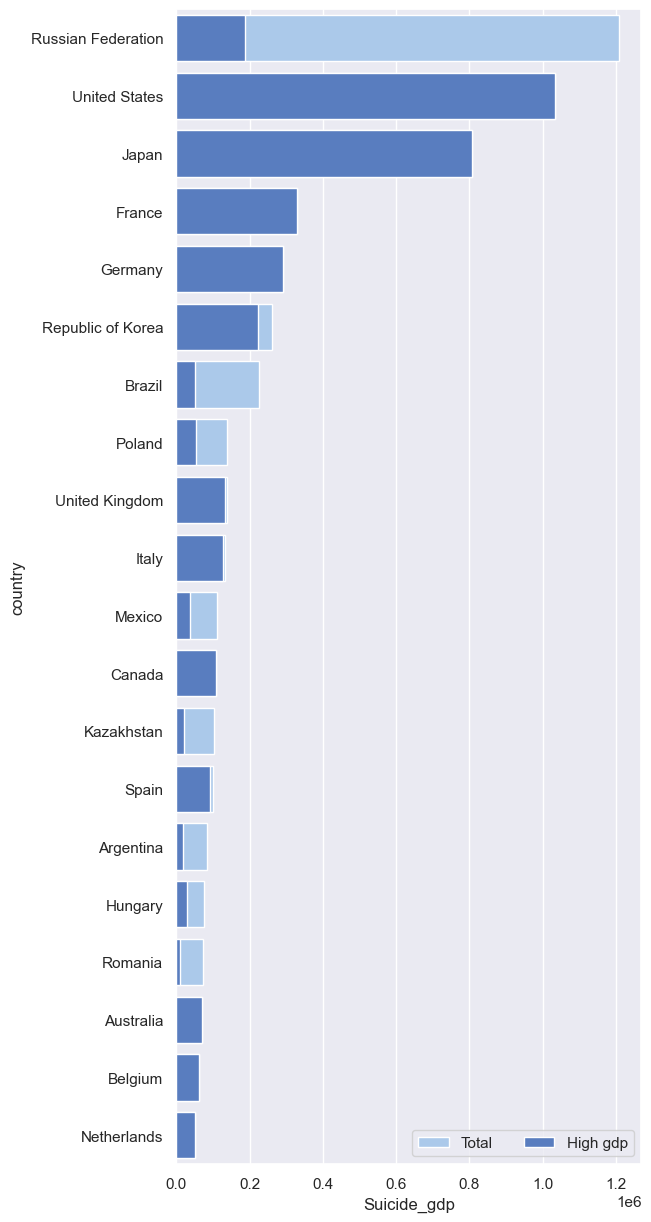

In [124]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total suicides
sns.set_color_codes("pastel")
sns.barplot(x="Tot_suicide", y="country", data=df_tot,
            label="Total", color="b")

# Plot the suicides where high gdp
sns.set_color_codes("muted")
sns.barplot(x="Suicide_gdp", y="country", data=df_tot,
            label="High gdp", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True);

#### Bubble chart

In [91]:
suicid_df[suicid_df['country-year'] == 'Spain2002']

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
23732,Spain,2002,male,75+ years,498,1171341,42.52,Spain2002,NaN,"705,145,868,624",17924,Silent
23733,Spain,2002,male,55-74 years,688,3804296,18.08,Spain2002,NaN,"705,145,868,624",17924,Silent
23734,Spain,2002,male,35-54 years,752,5784305,13.00,Spain2002,NaN,"705,145,868,624",17924,Boomers
23735,Spain,2002,male,25-34 years,414,3566812,11.61,Spain2002,NaN,"705,145,868,624",17924,Generation X
23736,Spain,2002,female,75+ years,154,1934508,7.96,Spain2002,NaN,"705,145,868,624",17924,Silent
23737,Spain,2002,male,15-24 years,196,2855801,6.86,Spain2002,NaN,"705,145,868,624",17924,Millenials
23738,Spain,2002,female,55-74 years,268,4260724,6.29,Spain2002,NaN,"705,145,868,624",17924,Silent
23739,Spain,2002,female,35-54 years,245,5794565,4.23,Spain2002,NaN,"705,145,868,624",17924,Boomers
23740,Spain,2002,female,25-34 years,103,3417162,3.01,Spain2002,NaN,"705,145,868,624",17924,Generation X
23741,Spain,2002,female,15-24 years,46,2719911,1.69,Spain2002,NaN,"705,145,868,624",17924,Millenials


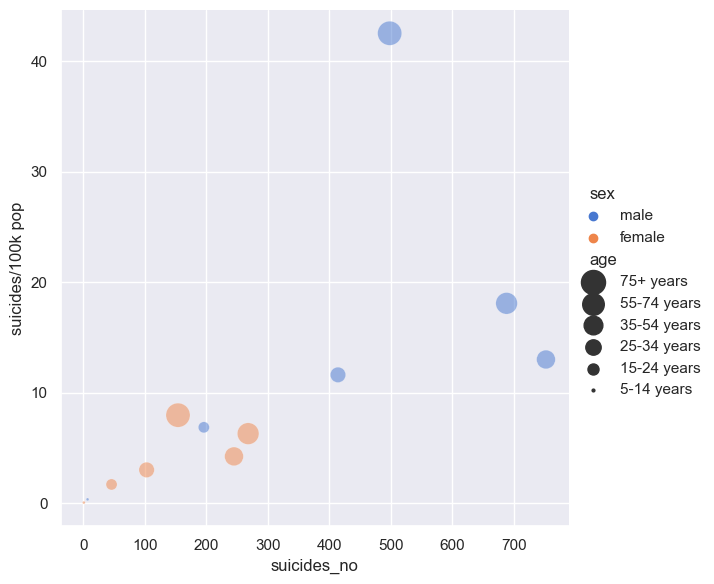

In [92]:
suicid_df2 = suicid_df[suicid_df['country-year'] == 'Spain2002']

sns.relplot(data=suicid_df2,
            x="suicides_no",
            y="suicides/100k pop",
            hue="sex", size="age",
            sizes=(4, 300),
            alpha=.5, palette="muted",
            height=6);

#### 